<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Задание-1." data-toc-modified-id="Задание-1.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Задание 1.</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Дополнительные-вводные:" data-toc-modified-id="Дополнительные-вводные:-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Дополнительные вводные:</a></span></li><li><span><a href="#Что-нужно-сделать?" data-toc-modified-id="Что-нужно-сделать?-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Что нужно сделать?</a></span></li><li><span><a href="#В-результате-должно-быть-3-файла:" data-toc-modified-id="В-результате-должно-быть-3-файла:-1.0.3"><span class="toc-item-num">1.0.3&nbsp;&nbsp;</span>В результате должно быть 3 файла:</a></span></li></ul></li></ul></li><li><span><a href="#Задание-2.-Back-to-Russia" data-toc-modified-id="Задание-2.-Back-to-Russia-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Задание 2. Back to Russia</a></span></li><li><span><a href="#Задание-3.-Check-it" data-toc-modified-id="Задание-3.-Check-it-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Задание 3. Check it</a></span></li><li><span><a href="#Задание-4.-Поделись-с-ближним" data-toc-modified-id="Задание-4.-Поделись-с-ближним-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Задание 4. Поделись с ближним</a></span></li></ul></div>

In [34]:

%matplotlib inline
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
from pandas_datareader import data as pdr
from bs4 import BeautifulSoup
import numpy as np
import openpyxl
from openpyxl import load_workbook
import os
import os.path
from pathlib import Path
from pycbrf.toolbox import ExchangeRates
import datetime
from datetime import date
import os
from openpyxl import Workbook

# Задание 1.

Вы - менеджер по продажам в нефтехимической компании. Вы ведете несколько ключевых клиентов, которые закупают продукты вашей компании. Ваша компания запускает новый продукт - "Волшебный белый порошок" (ВБП), который по своим свойствам похож на тот, что уже есть на рынке. Ваши клиенты предпочитают формульный подход к ценообразованию. Вам нужно предложить клиентам формулу расчета цены на ВБП. В зависимости от объемов, которые покупают клиенты, им может быть предложена скидка.

### Дополнительные вводные:

Так как продукт Б новый, возможно стоит предложить дисконт от цены Продукта А. Продукт производиться из нефти. Один из известных способов производства предполагает что из 16 баррелей нефти сделают одну тонну ВБП, а затраты на производство в районе 400 евро.

In [35]:
# Из данных есть:
# Цены на продукт А, который уже есть на рынке Европы
# ----- октябрь 2018 - 1600 евро
# ----- ноябрь 2018 - 1550 евро
# ----- февраль 2019 - 1600 евро

# Котировки нефти, курс eur/usd
dbc = pd.read_excel('cur_oil.xlsx')

# Затраты на производство
PRODUCTION_COST = 400 # (EUR)

# Расходы на логистику
EU_LOGISTIC_COST_EUR = 30 # в Европу в евро
CN_LOGISTIC_COST_USD = 130 # в Китай в долларах

# * Справочная информация по клиентам(объемы, локации, комментарии) 
customers = {
    'Monty':{
        'location':'EU',
        'volumes':200,
        'comment':'moving_average'
    },
    
    'Triangle':{
        'location':'CN',
        'volumes': 30,
        'comment': 'monthly'
    },
    'Stone':{
        'location':'EU',
        'volumes': 150,
        'comment': 'moving_average'
    },
    'Poly':{
        'location':'EU',
        'volumes': 70,
        'comment': 'monthly'
    }
}
# Скидки
discounts = {'up to 100': 0.01, # 1%
             'up to 300': 0.05, # 5%
             '300 plus': 0.1}   #10%



### Что нужно сделать?

1. Проанализировать имеющиеся данные.
2. Определить базовую формулу цены на условиях FCA (цена на заводе). То есть как бы выглядела цена на исторических данных.
3. Отобразить на графике.
4. Сделать расчет возможной цены по формуле для каждого из клиентов на условиях DDP (цена с доставкой). Записать все в один эксель файл, на разных листах. Каждый лист - название клиента.
5. Предложить формулу цены каждому из клиентов на условиях DDP (цена с доставкой).
- Создать директорию «для клиентов» и в ней сложить  файлы с расчетами.
- Каждый клиент - отдельный файл (любой из docx, xlsx, pptx, pdf)  с именем клиента… 

### В результате должно быть 3 файла:
1. Ноутбук с расчетами и графиками. 
2. Скрипт, который делает расчет цены для каждого клиента в одном файле
2. Скрипт, который делает расчет цены для каждого клиента в отельном файле

In [36]:
dbc = pd.read_excel('cur_oil.xlsx')


# определить дату и курс на нее
# FCA = цена за барль * курс * 16 + 400
# создать график
# определить дату, курс и клиент на нее
# DDP = цена за барль * курс * 16 + 400 + логистика в европу - дисконт * цену А
#                                        + логистика в китай * курс - дисконт * цену А
#
#



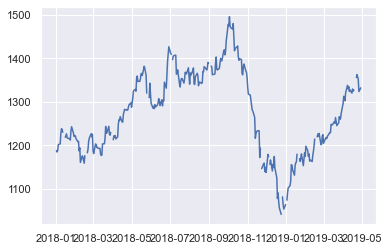

In [37]:
#Определить базовую формулу цены на условиях FCA (цена на заводе). То есть как бы выглядела цена на исторических данных.
#Отобразить на графике.
dbc['FCA'] = dbc['OIL']/dbc['EURUSD=X'] * 16 + PRODUCTION_COST
plt.plot(dbc['Date'], dbc['FCA'])

In [38]:
# добавляем столбце с ценами А
# Цены на продукт А, который уже есть на рынке Европы
# ----- октябрь 2018 - 1600 евро
# ----- ноябрь 2018 - 1550 евро
# ----- февраль 2019 - 1600 евро

A_cost = []

for x in dbc['Date']:
    if datetime.date(x.year,x.month,x.day) < datetime.date(2018,11,1):
        A_cost.append(1600)
    elif datetime.date(x.year,x.month,x.day) >= datetime.date(2018,11,1) and datetime.date(x.year,x.month,x.day) < datetime.date(2019,2,1):
        A_cost.append(1550)
    else: 
        A_cost.append(1600)

dbc['A_cost'] = A_cost
dbc


,Date,EURUSD=X,OIL,FCA,A_cost
0,2018-01-01,1.2005,NaN,NaN,1600
1,2018-01-02,1.2012,59.15,1187.878788,1600
2,2018-01-03,1.2063,59.15,1184.547791,1600
3,2018-01-04,1.2010,59.15,1188.009992,1600
4,2018-01-05,1.2069,60.44,1201.259425,1600
...,...,...,...,...,...
341,2019-04-23,1.1259,67.72,1362.359002,1600
342,2019-04-24,1.1224,67.14,1357.091946,1600
343,2019-04-25,1.1153,66.37,1352.138438,1600
344,2019-04-26,1.1137,64.27,1323.336626,1600


In [39]:
# Сделать расчет возможной цены по формуле для каждого из клиентов на условиях DDP (цена с доставкой).
# Записать все в один эксель файл, на разных листах. Каждый лист - название клиента.

filename='excel.xlsx'

wb = Workbook()
ws =  wb.active
#ws.title = "Changed Sheet"
wb.save(filename = filename)

def logistic_costs(name):
    if customers[name]['location']=='CN':
        costs = CN_LOGISTIC_COST_USD/dbc['EURUSD=X']
    else:
        costs = EU_LOGISTIC_COST_EUR
    return costs

def discounts(name):
    dist=float
    if int(customers[name]['volumes'])<=100:
        disc = 0.01
    elif int(customers[name]['volumes'])>100 and int(customers[name]['volumes'])<=300:
        disc = 0.05
    else:
        disc = 0.1
    return disc

book = load_workbook(filename)
writer = pd.ExcelWriter(filename, engine='openpyxl', mode='a') 
writer.book = book
#writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
writer.save()

if os.path.exists(filename):
    book = load_workbook(filename)
    writer.book = book



# Monty

sh_nm='Monty'
dbc['DDP'] = dbc['OIL']/dbc['EURUSD=X'] * 16 + PRODUCTION_COST + logistic_costs(sh_nm)-discounts(sh_nm)*dbc['A_cost']
dbc.to_excel(writer, sheet_name=sh_nm)
writer.save()


#Triangle

sh_nm='Triangle'
dbc['DDP'] = dbc['OIL']/dbc['EURUSD=X'] * 16 + PRODUCTION_COST + logistic_costs(sh_nm)-discounts(sh_nm)*dbc['A_cost']
dbc.to_excel(writer, sheet_name = sh_nm)
writer.save()


#Stone

sh_nm='Stone'
dbc['DDP'] = dbc['OIL']/dbc['EURUSD=X'] * 16 + PRODUCTION_COST + logistic_costs(sh_nm)-discounts(sh_nm)*dbc['A_cost']
dbc.to_excel(writer, sheet_name = sh_nm)
writer.save()


#Poly

sh_nm='Poly'
dbc['DDP'] = dbc['OIL']/dbc['EURUSD=X'] * 16 + PRODUCTION_COST + logistic_costs(sh_nm)-discounts(sh_nm)*dbc['A_cost']
dbc.to_excel(writer, sheet_name = sh_nm)
writer.save()

del book['Sheet']

writer.close()


In [40]:
#Предложить формулу цены каждому из клиентов на условиях DDP (цена с доставкой).
#Создать директорию «для клиентов» и в ней сложить файлы с расчетами.
#Каждый клиент - отдельный файл (любой из docx, xlsx, pptx, pdf) с именем клиента…
cwd = os.getcwd()
if os.path.exists(cwd + '\clients')==False:
    os.makedirs(cwd + '\clients')


# Monty

sh_nm='Monty'
dbc['DDP'] = dbc['OIL']/dbc['EURUSD=X'] * 16 + PRODUCTION_COST + logistic_costs(sh_nm)-discounts(sh_nm)*dbc['A_cost']
dbc.to_excel(cwd + f"\clients\{sh_nm}.xlsx")

#Triangle

sh_nm='Triangle'
dbc['DDP'] = dbc['OIL']/dbc['EURUSD=X'] * 16 + PRODUCTION_COST + logistic_costs(sh_nm)-discounts(sh_nm)*dbc['A_cost']
dbc.to_excel(cwd + f"\clients\{sh_nm}.xlsx")

#Stone

sh_nm='Stone'
dbc['DDP'] = dbc['OIL']/dbc['EURUSD=X'] * 16 + PRODUCTION_COST + logistic_costs(sh_nm)-discounts(sh_nm)*dbc['A_cost']
dbc.to_excel(cwd + f"\clients\{sh_nm}.xlsx")

#Poly

sh_nm='Poly'
dbc['DDP'] = dbc['OIL']/dbc['EURUSD=X'] * 16 + PRODUCTION_COST + logistic_costs(sh_nm)-discounts(sh_nm)*dbc['A_cost']
dbc.to_excel(cwd + f"\clients\{sh_nm}.xlsx")


# Задание 2. Back to Russia

К вам пришел новый клиент из России. Который использует продукт А и готов регулярно закупать ВБП для того, чтобы не быть привязанным к одному поставщику. Клиент готов забирать ВБП с завода самостоятельно.
1. На основе тех данных, которые уже есть предложите цену новому клиенту. 
2. Подготовьте скрипт, который будет использовать курс публикуемый на <a href='http://www.cbr.ru/currency_base/dynamics/'> сайте ЦБ РФ</a>.


In [41]:
# Использую специальный скрипт для определения курса ЦБРФ
today = date.today().strftime('%Y-%m-%d')
USD_rates = int(ExchangeRates(today)['USD'].value)
EUR_rates = int(ExchangeRates(today)['EUR'].value)
USD_to_EUR=EUR_rates/USD_rates

volumes = 0

discounts = {'up to 100': 0.01, # 1%
             'up to 300': 0.05, # 5%
             '300 plus': 0.1}   #10%

dbc['FCA'] = dbc['OIL']/dbc['EURUSD=X'] * 16 + PRODUCTION_COST



cwd = os.getcwd()
if os.path.exists(cwd + '\clients')==False:
    os.makedirs(cwd + '\clients')

print('Введите объем продукции за месяц')


while volumes == 0:
    try:
        volumes = int(input())
    except ValueError:
        print('Введите цифру')

def discounts(volumes):
    dist=float
    if volumes<=100:
        disc = 0.01
    elif volumes>100 and volumes<=300:
        disc = 0.05
    else:
        disc = 0.1
    return disc
    
DDP = dbc['OIL'].tolist()[-1]/USD_to_EUR * 16 + PRODUCTION_COST-discounts(volumes)*dbc['A_cost'].tolist()[-1]

print('цена реализации', DDP)



Введите объем продукции за месяц
12
цена реализации 1302.2213953488372


# Задание 3. Check it

* Подумайте, как можно проверить корректность работы алгоритма? 
* Какие возможны ошибки?
* Придумайте тесты для проверки возможных ошибок алгоритма
* Интергрируйте их в свои скрипты в виде исключений


In [ ]:
# создал ограничение на ввод слов в пердыдущем блоке




# Задание 4. Поделись с ближним

Вы решили пойти в отпуск на время вашего отсутствия вас будет заменять коллега. Он будет заниматься рассчетом цен для клиентов. Чтобы ему было проще вам нужно завернуть ваши скрипты в модуль, который будет запускать у себя коллега.

* Создайте модуль, который можно запускать в ноутбуке подкладывая в ту же директорию
* Хорошенько задокументируйте ВСЁ, но помните о PEP8

In [42]:
#функция info дает подробную информацию о модуле
import Module
Module.info()

Команда price вызывает расчет цены. 
 Составляющие команды: 
 price(количество продукции, цена продукта А, цена бензина, страна доставки (CN или EU)). 
 Если ввести 0 модуль предложит ввести значения в реальном времени.
